In [1]:
# MALAY CLASSIFIER

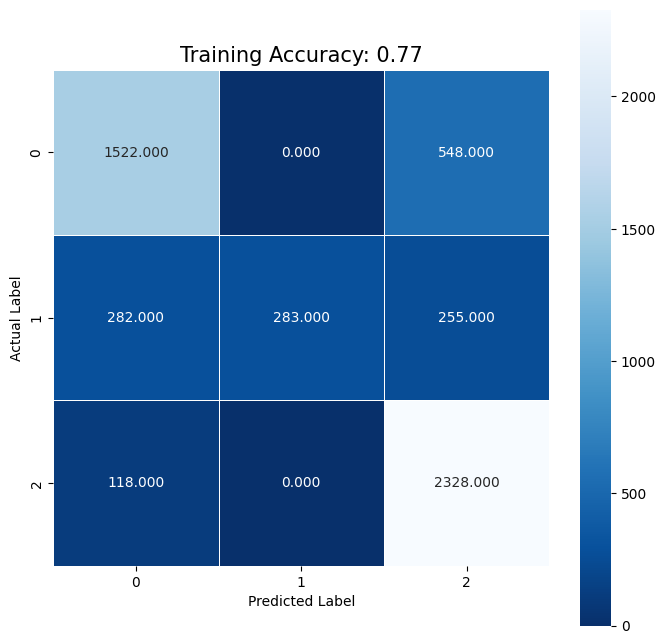

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Read data
df = pd.read_csv('MMT_donepreprocess.csv')

# Separate text and labels
x = df['normalized_text'] 
y = df['sentiment']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = tfidf_vectorizer.fit_transform(x)

# Split dataset 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Train classifier
y_pred_train = nb.predict(x_train)

# Evaluate classifier
conf_matrix = confusion_matrix(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title('Training Accuracy: {0:.2f}'.format(accuracy), size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

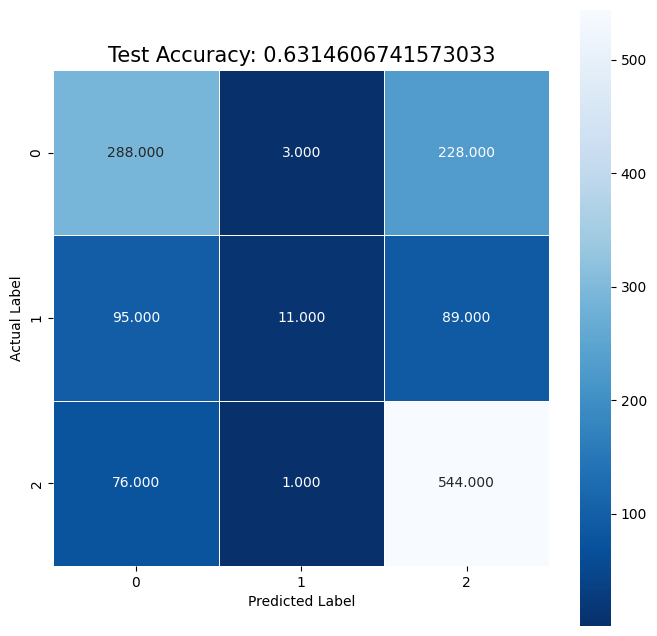

Classification Report:
               precision    recall  f1-score   support

          -1       0.63      0.55      0.59       519
           0       0.73      0.06      0.10       195
           1       0.63      0.88      0.73       621

    accuracy                           0.63      1335
   macro avg       0.66      0.50      0.48      1335
weighted avg       0.64      0.63      0.59      1335



In [3]:
# Test classifier
y_pred_test = nb.predict(x_test)

# Evaluate
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
classification_rep = classification_report(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title('Test Accuracy: {0}'.format(accuracy), size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Print additional metrics
print("Classification Report:\n", classification_rep)

In [4]:
# IMPROVE MODEL ACCURACY - apply cross validation & manipulate hyperparameter

Fold 1:
Test Accuracy: 0.6569

Fold 2:
Test Accuracy: 0.6642

Fold 3:
Test Accuracy: 0.6597

Fold 4:
Test Accuracy: 0.6522

Fold 5:
Test Accuracy: 0.6619

Mean accuracy across all folds: 0.6590
Best hyperparameters: {'alpha': 0.1}


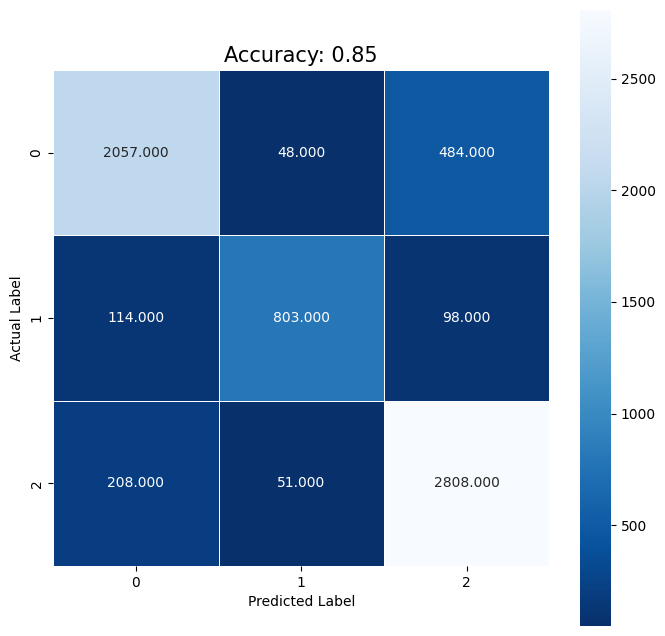

Malay NB Model's Accuracy
Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.79      0.83      2589
           0       0.89      0.79      0.84      1015
           1       0.83      0.92      0.87      3067

    accuracy                           0.85      6671
   macro avg       0.86      0.83      0.85      6671
weighted avg       0.85      0.85      0.85      6671



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read data
df = pd.read_csv('MMT_donepreprocess.csv')

# Separate text and labels
x = df['normalized_text']
y = df['sentiment']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = tfidf_vectorizer.fit_transform(x)

# Initialize KFold with the number of splits
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Initialize GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(classifier, param_grid, cv=kfold, scoring='accuracy')

# Initialize lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kfold.split(x)):
    print(f"Fold {fold + 1}:")
    
    # Split data into train and test sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Perform GridSearchCV on the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best estimator from the grid search
    best_classifier = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred_test = best_classifier.predict(x_test)
    
    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred_test)
    accuracy_scores.append(fold_accuracy)
    
    # Print accuracy for the test set
    print(f"Test Accuracy: {fold_accuracy:.4f}\n")

# Calculate mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Evaluate classifier
conf_matrix = confusion_matrix(y, best_classifier.predict(x))
accuracy = accuracy_score(y, best_classifier.predict(x))
classification_rep = classification_report(y, best_classifier.predict(x))

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title('Accuracy: {0:.2f}'.format(accuracy), size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Print additional metrics
print("Malay NB Model's Accuracy\nClassification Report:\n", classification_rep)

NB Accuracy Score: 0.6619

              precision    recall  f1-score      support
-1             0.701681  0.591150  0.641691   565.000000
0              0.527950  0.485714  0.505952   175.000000
1              0.665710  0.781145  0.718823   594.000000
accuracy       0.661919  0.661919  0.661919     0.661919
macro avg      0.631780  0.619337  0.622155  1334.000000
weighted avg   0.662873  0.661919  0.658229  1334.000000


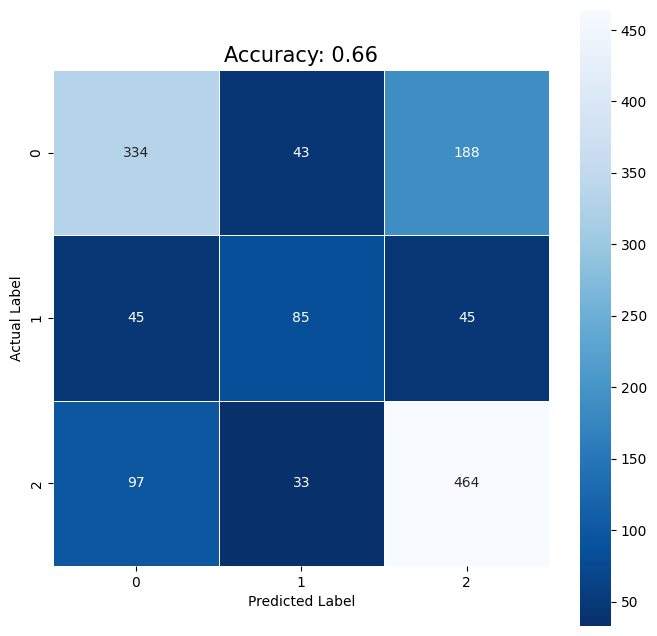

In [6]:
# Evaluate
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

# Print confusion matrix and classification report
print(f"NB Accuracy Score: {accuracy:.4f}\n")
print(pd.DataFrame(classification_rep).transpose())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.title(f'Accuracy: {accuracy:.2f}', size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()